<h1 align="center" style="color:black; background-color:purple"> <b> <font  color='white'>Walmart store Data Regression</font> </h1>

The objective is predicting store sales using historical markdown data.

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>Import Libraries</font> </h1>

In [4]:
# 1.0 Clear ipython memory
#%reset -f

#  Data manipulation and plotting modules
import numpy as np
import pandas as pd


# Data pre-processing
from sklearn.preprocessing import StandardScaler as ss


# Data splitting and model parameter search
from sklearn.model_selection import train_test_split


#  Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

#  Modeling modules
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [5]:
# Model evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# 
import matplotlib.pyplot as plt
import seaborn as sn

import time
import os
import gc
import random


In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>READING THE DATA</font> </h1>

In [7]:
path = "/kaggle/input/walmart-sales-dataset-of-45stores"

In [8]:
#  Our data file

tr_f = "/kaggle/input/walmart-sales-dataset-of-45stores/walmart-sales-dataset-of-45stores.csv"


total_lines = 250000
num_lines = 0.4 * total_lines    


#  Read randomly 'p' fraction of files

p = num_lines/total_lines  # fraction of lines to read (40%)

In [9]:
data = pd.read_csv(
         tr_f,
         header=0,   
         
         skiprows=lambda i: (i >0 ) and (random.random() > p)    
         )



<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>Explore data and process data</font> </h1>

In [10]:
# 3.0 Explore data
print("\n Shape")
data.shape                
print("\n\n Columns")
data.columns.values      
print("\n")                 
                        
print("\n\nData types")                        
data.dtypes.value_counts()  
print("\n\n--normalized--\n")
data.value_counts(normalize=True)
print("\n")
data.head(3)


 Shape


(2508, 8)



 Columns


array(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'], dtype=object)





Data types


float64    5
int64      2
object     1
dtype: int64



--normalized--



Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-07-2011  1488538.09    0             85.55        3.524       215.184137  7.962           0.000399
31     18-05-2012  1441473.82    0             72.42        3.630       221.380331  6.891           0.000399
       15-06-2012  1431003.43    0             81.51        3.393       221.400990  6.891           0.000399
       15-07-2011  1415473.91    0             91.05        3.575       215.013443  7.852           0.000399
       16-04-2010  1367448.28    0             67.87        2.808       210.149546  8.200           0.000399
                                                                                                      ...   
16     03-02-2012  475905.10     0             25.53        3.031       196.872892  6.162           0.000399
       03-09-2010  542087.89     0             58.02        2.773       190.362161  6.868           0.000399
       04-02-2011  479263.15   

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
2,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106


In [11]:
#  Examine data statistics
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,2508.000000,2.508000e+03,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
mean,23.118022,1.048726e+06,0.077751,60.064234,3.343260,171.706678,7.989090
std,13.140174,5.749986e+05,0.267833,18.625657,0.464817,39.287631,1.894097
min,1.000000,2.099862e+05,0.000000,7.460000,2.513000,126.064000,3.879000
25%,12.000000,5.455202e+05,0.000000,46.520000,2.901250,131.586613,6.891000
50%,23.000000,9.618309e+05,0.000000,62.195000,3.413000,182.955475,7.872000
75%,35.000000,1.423075e+06,0.000000,74.347500,3.730000,211.956645,8.595000
max,45.000000,3.818686e+06,1.000000,99.660000,4.468000,226.987364,14.313000


In [12]:
#  Check if there are Missing/null values? None

data.isnull().sum()            # None
print("\n----------")
data.isnull().sum().sum()      # None
print("\n------------")
data.duplicated().sum()        # None

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


----------


0


------------


0

# **FEATURE ENGINEERING**

In [13]:
# ENCODING STORE COLUMN
pd.get_dummies(data['Store'],prefix='store')

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
def onehot_encode(df , column ,prefix):
    df=df.copy()
    dummies = pd.get_dummies(df[column],prefix=prefix)
    df = pd.concat([df, dummies],axis=1)
    
    return df

In [17]:
#But the 'Date' column will be changed to datetime type

data['Date'] = pd.to_datetime(data['Date'], format=('%d-%m-%Y'))


In [18]:
data = onehot_encode(data,column='Store', prefix='Store')

In [19]:
#here we have add the date column to feature importance
data['day'] = data.Date.dt.day
data['month'] = data.Date.dt.month 
data['Year'] = data.Date.dt.year



<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>Splitting and Scaling</font> </h1>

In [20]:
#Creating a clustering

y=data[['Holiday_Flag']]
x=data[['Weekly_Sales','Fuel_Price','CPI','Store']]

In [21]:

# Split dataset into train and validation parts
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=0
                                                    )

# 
X_train.shape        
X_test.shape         
y_train.shape        
y_test.shape         

(1254, 4)

(1254, 4)

(1254, 1)

(1254, 1)

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>FITTING DECISION TREE</font> </h1>

In [22]:
from  sklearn.tree import DecisionTreeRegressor

dt_reg=DecisionTreeRegressor()
dt_reg=dt_reg.fit(X_train,y_train)

#prediction for DT
y_pred_dt=dt_reg.predict(X_test)
y_pred_dt

array([0., 0., 0., ..., 1., 1., 0.])

In [23]:
# mean Square Error

mse_dt=np.round(mean_squared_error(y_test,y_pred_dt),2)
mse_dt

0.13

In [24]:
#r2 score


r2_score_dt=np.round(r2_score(y_test,y_pred_dt),3)
r2_score_dt

-0.75

In [25]:
#mean absolure error

MAE_dt=np.round(mean_absolute_error(y_test,y_pred_dt),4)
MAE_dt

0.1284

In [26]:
#Feature Importance
#x train
feature_imp = pd.Series(dt_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
feature_imp*100

Fuel_Price      38.350951
CPI             30.585358
Weekly_Sales    24.354044
Store            6.709646
dtype: float64

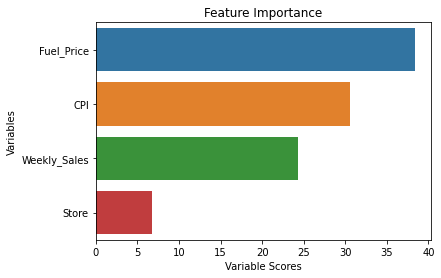

In [27]:
import seaborn as sn
#Displaying the feature_importances data
sn.barplot(x= feature_imp*100, y = feature_imp.index);
plt.xlabel("Variable Scores");
plt.ylabel("Variables");
plt.title("Feature Importance");
plt.show();

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>logistic and svc regressor**</font> </h1>

In [28]:
from sklearn.linear_model import LogisticRegression

#logistic regression
lr_reg=LogisticRegression();
lr_reg=lr_reg.fit(X_train,np.ravel(y_train));

#prediction for LR
y_pred_lr=lr_reg.predict(X_test);

In [29]:
# mean Square Error

mse_lr=np.round(mean_squared_error(y_test,y_pred_lr),2)
print("\n logistic mse")
mse_lr

#r2 score

r2_score_lr=np.round(r2_score(y_test,y_pred_lr),3)
print("\n \n logestic r2")
r2_score_lr

#mean absolure error

MAE_lr=np.round(mean_absolute_error(y_test,y_pred_lr),4)
print("\n \n logestic MAE")
MAE_lr



 logistic mse


0.08


 
 logestic r2


-0.087


 
 logestic MAE


0.0797

# **Fittind SVM**

In [30]:
from sklearn.svm import SVC
svm_reg=SVC()
svm_reg=svm_reg.fit(X_train,np.ravel(y_train))

#prediction for SVM

y_pred_svm=svm_reg.predict(X_test)

In [31]:
# mean Square Error

mse_svm=np.round(mean_squared_error(y_test,y_pred_svm),2)
print("\n SVC mse")
mse_svm

#r2 score

r2_score_svm=np.round(r2_score(y_test,y_pred_svm),3)
print("\n \n SVC r2")
r2_score_svm

#mean absolure error

MAE_svm=np.round(mean_absolute_error(y_test,y_pred_svm),4)
print("\n \n SVC MAE")
MAE_svm



 SVC mse


0.08


 
 SVC r2


-0.087


 
 SVC MAE


0.0797

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>FITTING A GRADIANT BOOST REGRESSOR</font> </h1>

In [32]:
#creating parameters

parameters = {
    "n_estimators": 200,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error"
}

In [33]:
#GradientBoostingRegressor

gb_reg=GradientBoostingRegressor(**parameters)
gb_reg=gb_reg.fit(X_train,np.ravel(y_train))

gb_reg

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=5,
                          n_estimators=200)

In [34]:
#generatind prediction for GBR

y_pred_gb=gb_reg.predict(X_test)
y_pred_gb
print("\n")
pred_gb=gb_reg.predict(X_train)
pred_gb

array([0.0407888 , 0.07810958, 0.04930417, ..., 0.08334923, 0.29797491,
       0.05316169])

array([0.06230029, 0.07434106, 0.04695655, ..., 0.06908298, 0.09650384,
       0.04096983])

In [35]:
# mean Square Error

mse_gbr=np.round(mean_squared_error(y_test,y_pred_gb),2)
mse_gbr


0.06

In [36]:
#r2 score


r2_score_gb=np.round(r2_score(y_test,y_pred_gb),3)
r2_score_gb

0.136

In [37]:
#mean absolure error

MAE_gb=np.round(mean_absolute_error(y_test,y_pred_gb),4)
MAE_gb

0.129

In [38]:
#Feature Importance
#x train
feature_imp1 = pd.Series(gb_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
feature_imp1*100

Fuel_Price      60.599983
CPI             21.890072
Weekly_Sales    12.688218
Store            4.821728
dtype: float64

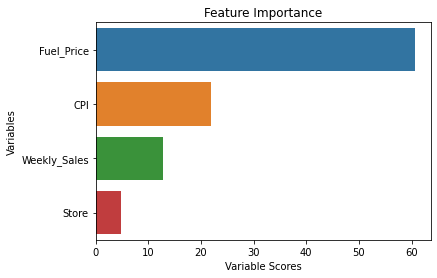

In [39]:
import seaborn as sn
#Displaying the feature_importances data
sn.barplot(x= feature_imp1*100, y = feature_imp.index);
plt.xlabel("Variable Scores");
plt.ylabel("Variables");
plt.title("Feature Importance");
plt.show();

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>GRID SEARCH CV</font> </h1>

In [40]:
#parameters

parameters2={'learning_rate':[0.01, 0.1],
        'max_depth':[2,5],
        'min_child_weight':[1,3,5],
        'subsample':[.5, .7],
        'n_estimators':[100,150]}

In [41]:
xgb_rg=XGBRegressor()

gs_reg=GridSearchCV(estimator=xgb_rg,
                    param_grid=parameters2,
                    cv=2,verbose=2,n_jobs=-1)

#fitting
gs_reg.fit(X_train,np.ravel(y_train))

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                  

In [42]:
#performance of each model
print("\ngood model score")
gs_reg.best_score_

print("\n\n---- accuracy parameters")
gs_reg.best_params_



good model score


0.043457985950333844



---- accuracy parameters


{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 150,
 'subsample': 0.7}

In [43]:
#predicting score

gs_pred=gs_reg.predict(X_test)
gs_pred

array([0.02879728, 0.07066712, 0.03792253, ..., 0.18893914, 0.03010168,
       0.05951785], dtype=float32)

In [44]:
# mean Square Error

mse_gs=np.round(mean_squared_error(y_test,gs_pred),2)
print("\n\ngs mse")
mse_gs

#r2 score

r2_score_gs=np.round(r2_score(y_test,gs_pred),3)
print("------\n\ngs r2")
r2_score_gs

#mean absolure error

MAE_gs=np.round(mean_absolute_error(y_test,gs_pred),4)
print("----\n\ngs MAE")
MAE_gs




gs mse


0.07

------

gs r2


0.104

----

gs MAE


0.1305

In [45]:
#feature importance

importances=gs_reg.best_estimator_.feature_importances_
f_imp=pd.DataFrame(importances, )
f_imp

,0
0,0.210228
1,0.335954
2,0.290578
3,0.163241


<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>XGBOOST REGRESSOR</font> </h1>

In [46]:
#create a function
xgb_rg=XGBRegressor()

#fitting data
xgb_rg.fit(X_train,y_train)
xgb_rg.fit

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<bound method XGBModel.fit of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)>

In [47]:
#predict the data
xgb_pred=xgb_rg.predict(X_test)
xgb_pred

array([-1.1289917e-02, -9.1146817e-04, -2.9342857e-04, ...,
        5.5227107e-01,  5.4772580e-01,  8.5644638e-03], dtype=float32)

In [48]:
X_test.iloc[0]

Weekly_Sales    1.302600e+06
Fuel_Price      2.669000e+00
CPI             2.145463e+02
Store           1.100000e+01
Name: 568, dtype: float64

In [49]:
y_test.iloc[0]

Holiday_Flag    0
Name: 568, dtype: int64

In [50]:
#training prediction

pred_xgb=xgb_rg.predict(X_train)

  **XGB test errors**

In [51]:
# mean Square Error

mse_xgbr=np.round(mean_squared_error(y_test,xgb_pred),2)
mse_xgbr


0.05

In [52]:
#r2 score

r2_score_xgb=np.round(r2_score(y_test,xgb_pred),3)
r2_score_xgb

0.297

In [53]:
#mean absolure error

MAE_xgb=np.round(mean_absolute_error(y_test,xgb_pred),4)
MAE_xgb

0.1077

**XGB train error score**

In [54]:
# mean Square Error

mse_xgbr=np.round(mean_squared_error(y_train,pred_xgb),2)
print("\nxgbr mse")
mse_xgbr

#r2 score

r2_score_xgb=np.round(r2_score(y_train,pred_xgb),3)
print("\n \n xgbr r2")
r2_score_xgb

#mean absolure error

MAE_xgb=np.round(mean_absolute_error(y_train,pred_xgb),4)
print("\n \n xgbr MAE")
MAE_xgb



xgbr mse


0.0


 
 xgbr r2


0.994


 
 xgbr MAE


0.0113

In [55]:
imp_val=xgb.best_estimator_.named_steps["xg"].feature_importances_
df_imp = pd.DataFrame(data = imp_val
                       columns = ['imp']
                       index=colnames
                      ).sort_values()

SyntaxError: invalid syntax (3950693690.py, line 3)

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>RandomizedSearch CV</font> </h1>

In [56]:
#hyperparameter initialization 

params= {'learning_rate':  range(0, 8),
              'n_estimators':   range(50,400),
              'max_depth':      range(3,10)
              }

In [57]:
#initiating randomize object

rs=RandomizedSearchCV(estimator=xgb_rg, 
                           param_distributions=params,
                        cv=3, verbose=1, n_jobs=-1 )
print("\n\ntraing model:")
#Train the model
rs.fit(X_train,y_train)

print("\n\npredictin:")
#predicting the model 
y_pred=rs.predict(X_test)
y_pred[:4]



traing model:
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-0.74783482 -1.72165071         nan -0.03967177 -1.76886326         nan
 -2.60036234 -1.442608           nan -2.60036234]
  category=UserWarning,


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min



predictin:


array([-0.02140303,  0.01983093, -0.02367684,  0.01841398], dtype=float32)

In [58]:
# mean Square Error

mse_rs=np.round(mean_squared_error(y_test,y_pred),2)
print("\n rs mse")
mse_rs

#r2 score

r2_score_rs=np.round(r2_score(y_test,y_pred),3)
print("------\n rs r2")
r2_score_rs

#mean absolure error

MAE_rs=np.round(mean_absolute_error(y_test,y_pred),4)
print("----\n rs MAE")
MAE_rs



 rs mse


0.06

------
 rs r2


0.233

----
 rs MAE


0.1172

<h1 align="center" style="color:black; background-color:pink"> <b> <font  color='white'>Bayes search CV</font> </h1>

In [64]:
#parameters

baseparams={
             'min_child_weight': Integer(0, 100),
             'max_depth': Integer(1, 9),       
             'subsample': Real (0.5, 1.0, 'uniform'),                                                                                    
             'colsample_bytree': Real(0.5, 1.0, 'uniform'), 
             'reg_lambda':Real(1e-5,100,prior = 'log-uniform'),                                                                      'reg_alpha': Real(1e-5,100,prior= 'log-uniform'),                                                         
             'learning-rate': Real(0.01,0.2,prior='log-uniform'), 
             'scale_pos_weight': Real(1, 500, 'log-uniform'),  
             'alpha':Real(1e-5,100,prior='log-uniform'),
             'gamma':Real(1e-9, 0.5,prior='log-uniform'),
             'n_estimators':Integer(50,100)}

In [65]:
#object creating

bsearch=BayesSearchCV(estimator=xgb_rg,
                      search_spaces=baseparams,
                      n_iter=100,
                      scoring=None
                      fit_params=None,
                      refit=True,
                      cv=5,
                      verbose=1,
                      return_train_score=False
                      )

#training the model

bsearch.fit(X_train,y_train);

SyntaxError: invalid syntax (2323075461.py, line 7)

In [66]:
bayes_tuner=BayesSearchCV{
                            
}

SyntaxError: invalid syntax (1121755021.py, line 1)

In [67]:
#Checking the model score

print("BayesSearch result \n")
print("Best score \n",bsearch.best_score_)
print("Best params \n", bsearch.best_params_)

BayesSearch result 



NameError: name 'bsearch' is not defined

In [68]:
#predicting the model

bpred=bsearch.predict(X_test)
bpred

NameError: name 'bsearch' is not defined

[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsampl

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  F

[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsampl

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  F

[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=2, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsampl

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 790, in r2_score
    y_true, y_pred, multioutput
  File "/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  F

In [69]:
# mean Square Error

mse_bayes=np.round(mean_squared_error(y_test,bpred),2)
print("\n bayes mse")
mse_bayes

#r2 score

r2_score_bayes=np.round(r2_score(y_test,bpred),3)
print("------\n\n bayes r2")
r2_score_bayes

#mean absolure error

MAE_bayes=np.round(mean_absolute_error(y_test,bpred),4)
print("----\n\n bayes MAE")
MAE_bayes


NameError: name 'bpred' is not defined

In [70]:
model = lgb.LGBMRegressor(                # Regressor will also perform classification
                            objective='binary',
                            metric='auc', # This output must match with what
                                          #  we specify as input to Bayesian model
                            n_jobs=2,
                            verbose=0,
                            #baggeng_freq=1,
                            #bagging_fraction =0.8,
                          )

NameError: name 'lgb' is not defined

In [71]:
# 16.1 Parameter search space for selected modeler
#      For suggested parameter grid for lightgbm, pl see: 
#         https://github.com/Microsoft/LightGBM/issues/695
#
params = {
        # The 'boosting' option parameter give lots of errors. 
        # Do not use it. (Removed 'rf' from it. Avoids errors)
        'boosting'    :   Categorical(['gbdt','dart']),                                                         
        'n_estimators':   Integer(50, 100), # No of boosted trees or iterations to fit (default: 100).

        'num_leaves'  :   Integer(5,45),   # Max tree leaves for base boosters
                                           # Create a node only if no of leaves exceed this limit
                                           #  and also following condition of 'min_child_samples' is met

        'min_child_samples': Integer(1, 50),  # Create a node only if min data-points at this node
                                              #  exceed this limit

        'feature_fraction' : Real(0.1, 0.9),  # Randomly select part of features on each iteration
                                              #  for every boosted tree

        'bagging_fraction' : Real(0.8, 1),   # Randomly select part of data without resampling
                                             #   for each boosted tree

        'bagging_freq'     : Integer(1,10),  # k means perform bagging at every k iteration

        'max_depth'        : Integer(1, 50), # Max tree depth for base learners, -1 means no limit.

        'learning_rate': Real(0.01, 1.0, 'log-uniform'), # Prob of interval 1 to 10 is same as 10 to 100
                                                         # Equal prob of selection from 0.01 to 0.1, 0.1
                                                         # to 1
                                                         # In a loguniform distributon, log-transformed
                                                         # random variable is uniformly distributed

        'reg_lambda': Real(1e-9, 1000, 'log-uniform'),  # L2 regularization term on weights.
        'reg_alpha':  Real(1e-9, 1.0, 'log-uniform'),   #  L1 regularization

        'scale_pos_weight': Real(1, 10),       # default: 1
                                               # used only in binary application
                                               # How much more importance should be given to binary
                                               # weight of labels with positive class

        #-----***** Not understood **** -----

        'max_bin': Integer(100, 1000),        # max number of bins that feature
                                              #  values will be bucketed in
                                              # small number of bins may reduce
                                              # training accuracy but may increase
                                              # general power (deal with over-fitting)

        'min_child_weight':  Real(1, 10),     # Deals with overfitting

        'subsample_for_bin': Integer(100000, 500000)  #  Number of samples for constructing bins(default: 200000)
                                               # setting this to larger value will give better training
                                               #  result, but will increase data loading time
           }



In [72]:
# 16.2.1
cvStrategy = StratifiedKFold(
                             n_splits=3,
                             shuffle=True,
                             random_state=42
                            )

NameError: name 'StratifiedKFold' is not defined

<h1 align="center" style="color:black; background-color:yellow"> <b> <font  color='blue'>ThankYou</font> </h1>